In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.linear_model import SGDClassifier #stochastic gradient classifier
from sklearn.neighbors import KNeighborsClassifier #KNN
import xgboost as xgb

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict, cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter= ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.notnull().sum()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

In [6]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [7]:
# A function that takes a dataframe and colume and find the % of the value count 
def percent_value_counts(df, feature):
    """selecting loction of selected feature column value count with null value"""

    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [8]:
percent_value_counts(df, 'y')

,Total,Percent
no,36548,88.73
yes,4640,11.27


In [9]:
percent_value_counts(df, 'marital')

,Total,Percent
married,24928,60.52
single,11568,28.09
divorced,4612,11.20
unknown,80,0.19


Text(0.5, 1.0, 'Bar chart of Marital column')

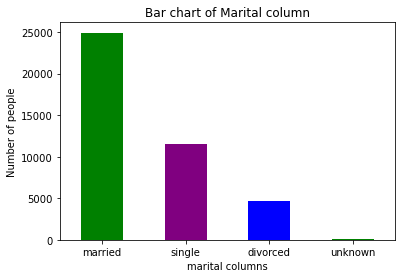

In [10]:
df['marital'].value_counts().plot(kind = 'bar', color = ['green', 'purple', 'blue'])
plt.ylabel('Number of people')
plt.xlabel('marital columns')
plt.xticks(rotation = 0)
plt.title('Bar chart of Marital column')

In [11]:
percent_value_counts(df, 'loan')

,Total,Percent
no,33950,82.43
yes,6248,15.17
unknown,990,2.40


<ipython-input-12-6013048e93d1>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  int_column = df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index
C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument wi

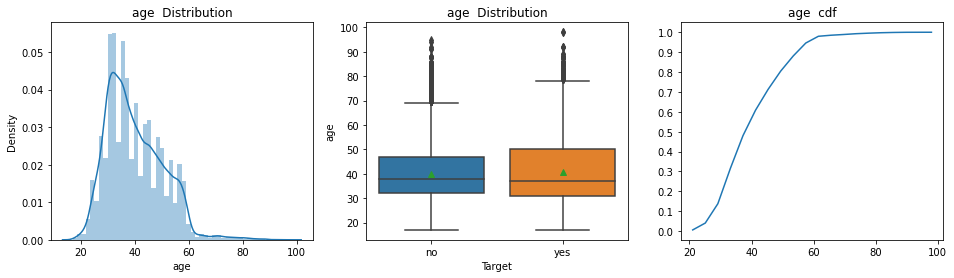

C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


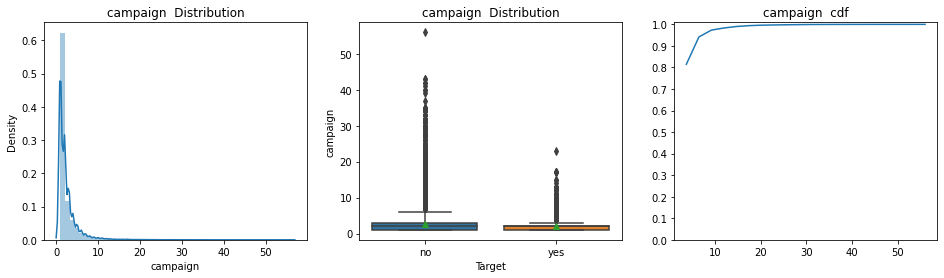

C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


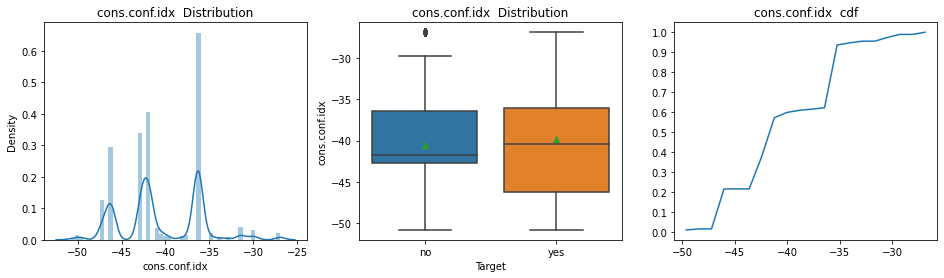

C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


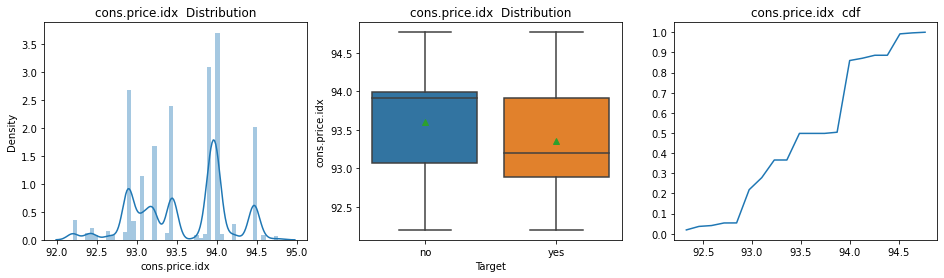

C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


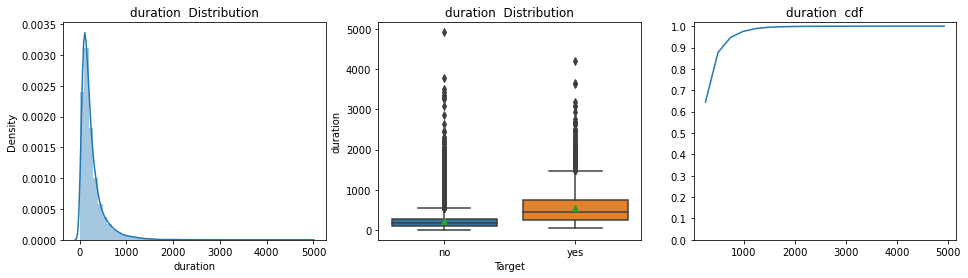

C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


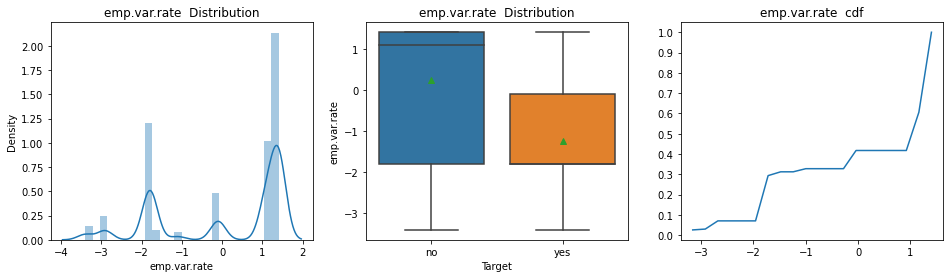

C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


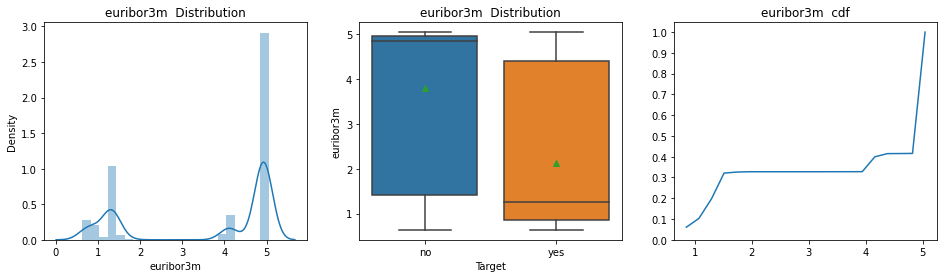

C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


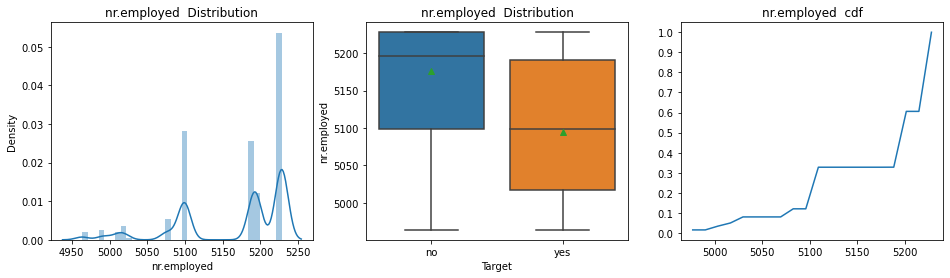

C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


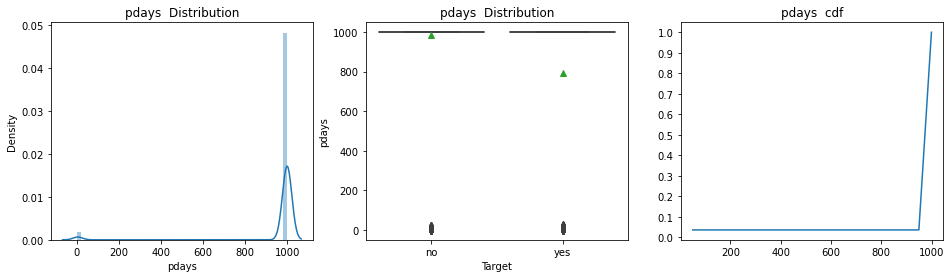

C:\Users\ajaoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-6013048e93d1>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bins = np.histogram(df[col], bins=20, normed=True)


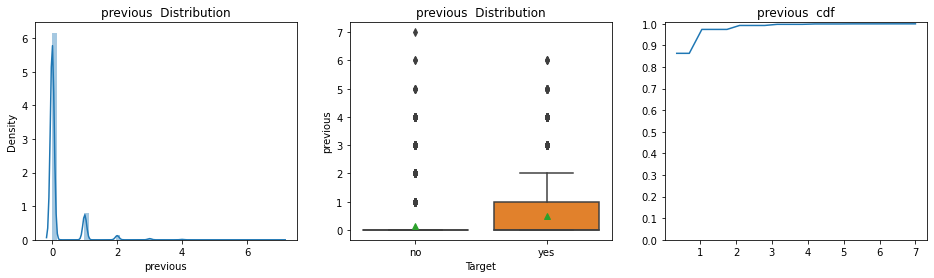

In [12]:
int_column = df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index

for col in int_column:
    plt.figure(figsize=(16,4))

    plt.subplot(1,3,1)
    sns.distplot(df[col], kde = True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'{col}  Distribution')

    plt.subplot(1,3,2)
    sns.boxplot(x='y', y=col, data =df, showmeans=True )
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.title(f'{col}  Distribution')

    plt.subplot(1,3,3)
    counts, bins = np.histogram(df[col], bins=20, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bins[1:], cdf/cdf[-1])

    #plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f'{col}  cdf')
    plt.show()
    print()


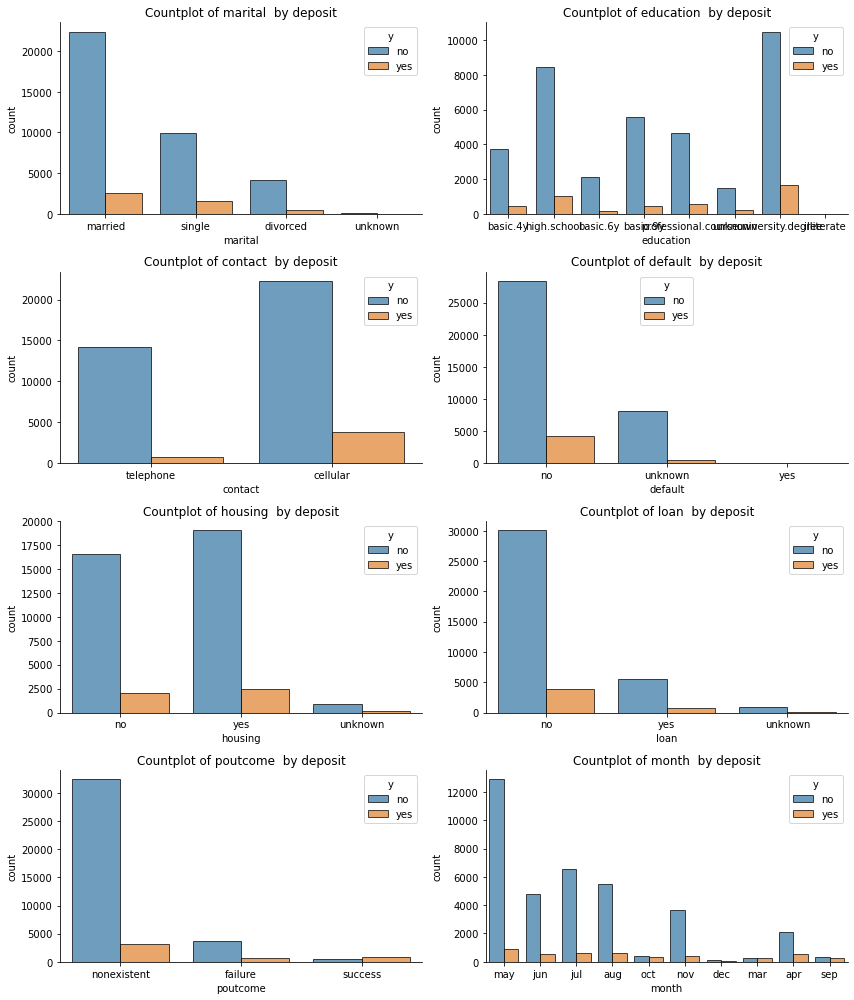

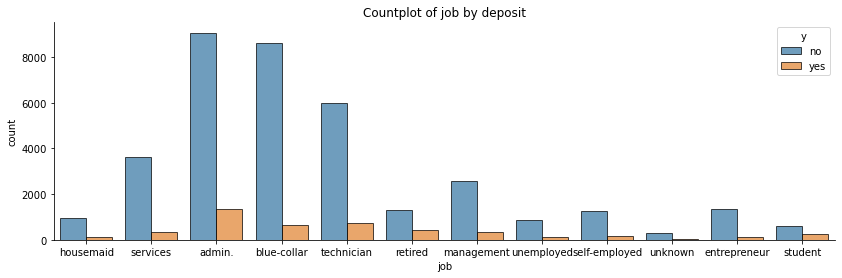

In [13]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='y',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of job by deposit")
plt.show()

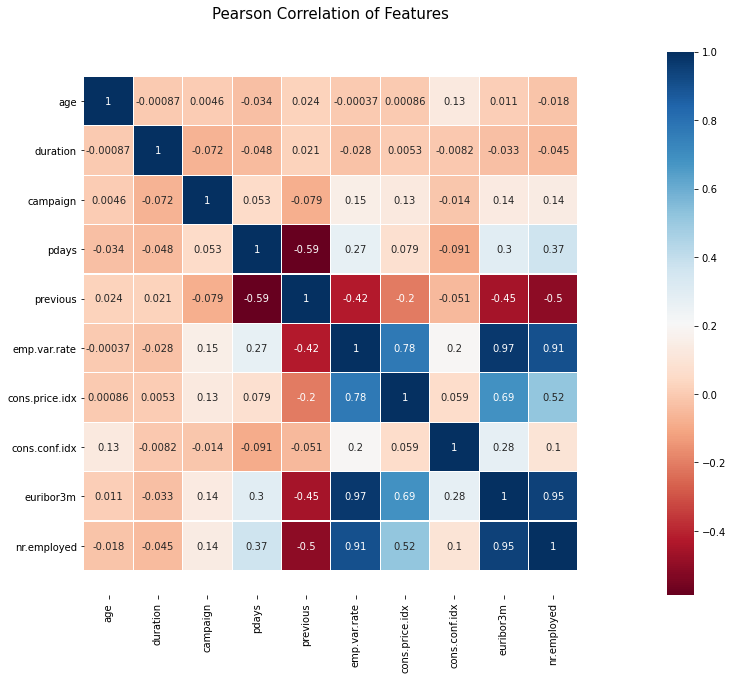

In [14]:
def corr_matrix(data):
    # correlation matrix.
    colormap = plt.cm.RdBu
    plt.figure(figsize=(32,10))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    ax = sns.heatmap(data.corr(),
                    linewidths=0.1,
                    vmax=1.0, 
                    square=True,
                    cmap=colormap,
                    linecolor='white',
                    annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

corr_matrix(df)

In [15]:
for col, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(col)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


In [16]:
labelenoder = LabelEncoder()


features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month", 'job', 'day_of_week', 'y']
for col in features:
    df[col] = labelenoder.fit_transform(df[col])

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
percent_value_counts(df, 'y')

,Total,Percent
0,36548,88.73
1,4640,11.27


## Undersampling and Feature Engineering

In [19]:
X = df.drop('y', axis=1)

y = df['y']


In [20]:
df[df['y'] == 1].shape

(4640, 21)

In [21]:
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)
pd.Series(y).value_counts()


0    36548
1    36548
Name: y, dtype: int64

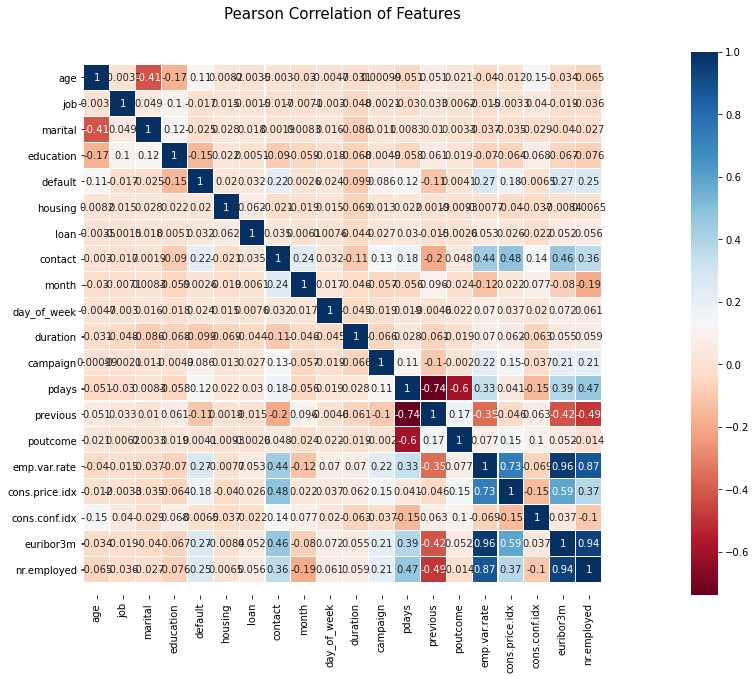

In [22]:
# Generate correlation matrix heat map to check which feature has greatest influence on the output
corr_matrix(X)

In [23]:
np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [24]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train.shape

(51167, 20)

* SVM
* decision tree
* logistic regression 
* random forest classifer 
* k-NN

In [26]:
import time
#Base models
# putting the models into a dictionary 
models = {'SVM' : SVC(),
          'Decision Tree': DecisionTreeClassifier(),
          'logistic Resgression' : LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'random forest classifier': RandomForestClassifier(),
          'XGB Classifier': xgb.XGBClassifier()
          }

def model_building(models, X_train, X_test, y_train, y_test):
    np.random.seed(100)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
        # model_score[name] = '{0:.2f}%'.format(model.score(X_test, y_test) * 100)
    return model_score 

In [27]:
model_score = model_building(models, X_train, X_test, y_train, y_test)
model_score

C:\Users\ajaoo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'SVM': 0.920516211409549,
 'Decision Tree': 0.926535637739979,
 'logistic Resgression': 0.8834876191344795,
 'KNN': 0.9187833462538192,
 'random forest classifer': 0.9517989876419354,
 'XGB Classifier': 0.9468740024624925}

In [28]:
# creating an evalutaion function to evaluate the models
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 score: {f1 * 100:.2f}%")

    return metric_dict

<AxesSubplot:>

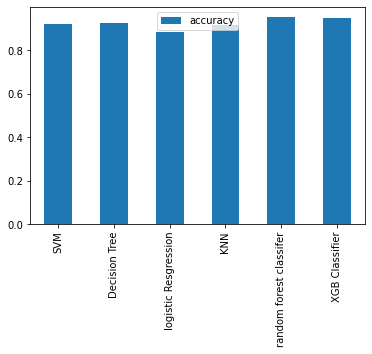

In [29]:
model_compare = pd.DataFrame(model_score, index=["accuracy"] )
model_compare.T.plot.bar()

In [30]:
def base_model(model):
    
    np.random.seed(42)
    clf = model()
    clf.fit(X_train, y_train)

    # Make predictions
    y_preds = clf.predict(X_test)

    # Evaluate the classifier
    baseline_metrics = evaluate_preds(y_test, y_preds)
    baseline_metrics

In [31]:
base_model(RandomForestClassifier)

Acc: 95.05%
Precision: 93.71%
Recall: 96.62%
F1 score: 95.14%


In [32]:
base_model(SVC)

Acc: 92.05%
Precision: 90.25%
Recall: 94.36%
F1 score: 92.26%


In [33]:
base_model(DecisionTreeClassifier)

Acc: 92.48%
Precision: 91.75%
Recall: 93.43%
F1 score: 92.58%


In [34]:
base_model(LogisticRegression)

Acc: 88.35%
Precision: 87.95%
Recall: 88.98%
F1 score: 88.46%


In [35]:
base_model(KNeighborsClassifier)

Acc: 91.88%
Precision: 90.30%
Recall: 93.91%
F1 score: 92.07%


In [36]:
base_model(xgb.XGBClassifier)

[18:01:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ajaoo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Acc: 94.69%
Precision: 93.87%
Recall: 95.67%
F1 score: 94.76%


In [37]:

# Create a hyperparameter grid for LogisticRegression
logistic_reg_grid = {"C": np.logspace(-10, 10, 40),
                     "multi_class": ["auto"],
                     "penalty": ["l1", "l2"]}
                      

# Create a hyperparameter grid for RandomForestClassifier
randomforest_grid = {"n_estimators": np.arange(10, 1000, 50),
                     "max_depth": [None, 3, 5, 10, 15],
                     "min_samples_split": np.arange(2, 20, 2),
                     "min_samples_leaf": np.arange(1, 20, 2)}

#create a hyperparameter grid for KNN
KNN_grid = {"n_neighbors": list(range(100,300)),
            "weights": ["uniform", "distance"],
            "algorithm": ["auto"]}

# Create a hyperparameter grid for SVC
svc_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [38]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
RS_logistic_reg = RandomizedSearchCV(LogisticRegression(),
                                     param_distributions=logistic_reg_grid,
                                     cv=5,
                                     n_iter=10,
                                     verbose=True)

# Fit random hyperparameter search model for LogisticRegression
RS_logistic_reg.fit(X_train, y_train)
y_preds = RS_logistic_reg.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ajaoo\anaconda3\lib\site-packages\sklearn\model_selection\_v

In [39]:
RS_logistic_reg.best_params_

{'penalty': 'l2', 'multi_class': 'auto', 'C': 0.004923882631706731}

In [40]:
# Evaluate the randomized search Logistic Regression model
RS_logistic_reg.metric = evaluate_preds(y_test, y_preds)


Acc: 88.02%
Precision: 87.56%
Recall: 88.74%
F1 score: 88.14%


In [41]:
randomforest_grid

# Tune randomforest

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
RS_randomforest = RandomizedSearchCV(RandomForestClassifier(),
                                     param_distributions=randomforest_grid,
                                     cv=5,
                                     n_iter=10,
                                     verbose=True)

# Fit random hyperparameter search model for LogisticRegression
RS_randomforest.fit(X_train, y_train)
y_preds = RS_randomforest.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [42]:
RS_randomforest.best_params_

{'n_estimators': 510,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 15}

In [43]:
RS_randomforest.metric = evaluate_preds(y_test, y_preds)

Acc: 94.34%
Precision: 92.23%
Recall: 96.89%
F1 score: 94.50%


In [44]:
# Tune KNN

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
RS_KNN = RandomizedSearchCV(KNeighborsClassifier(),
                                     param_distributions=KNN_grid,
                                     cv=5,
                                     n_iter=10,
                                     verbose=True)

# Fit random hyperparameter search model for LogisticRegression
RS_KNN.fit(X_train, y_train)
y_preds = RS_KNN.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [45]:
RS_KNN.best_params_

{'weights': 'distance', 'n_neighbors': 116, 'algorithm': 'auto'}

In [46]:
RS_KNN.metric = evaluate_preds(y_test, y_preds)

Acc: 89.53%
Precision: 87.62%
Recall: 92.17%
F1 score: 89.84%


In [47]:
# Tune SVM
svc_grid
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
RS_SVC = RandomizedSearchCV(SVC(),
                                     param_distributions=svc_grid,
                                     cv=5,
                                     n_iter=10,
                                     verbose=True)

# Fit random hyperparameter search model for LogisticRegression
RS_SVC.fit(X_train, y_train)
y_preds = RS_SVC.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [48]:
RS_SVC.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

In [49]:
RS_SVC.metric = evaluate_preds(y_test, y_preds)

Acc: 93.28%
Precision: 92.09%
Recall: 94.76%
F1 score: 93.40%


In [50]:
# using random forest results: confusion_matrix and classification report
y_preds=RS_randomforest.predict(X_test)
print(confusion_matrix(y_preds ,y_test))
print(classification_report(y_preds ,y_test))

[[10022   342]
 [  899 10666]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10364
           1       0.97      0.92      0.95     11565

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



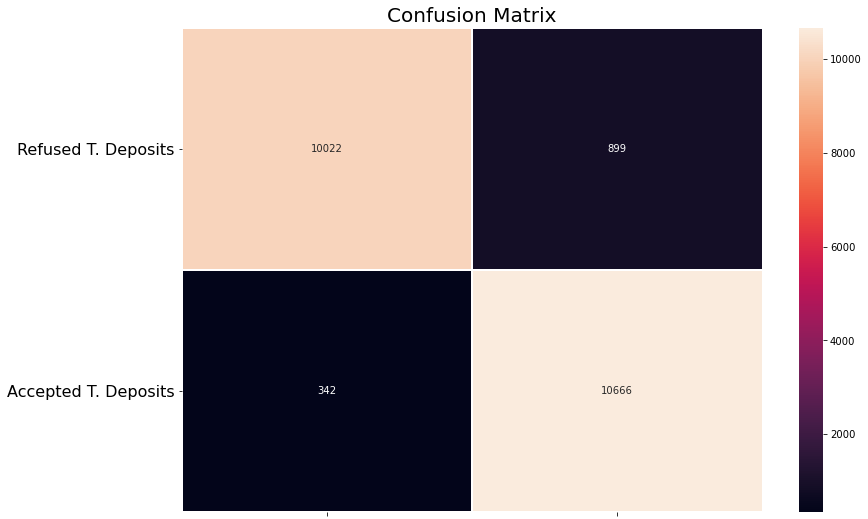

In [51]:
conf_matrix = confusion_matrix(y_test, y_preds)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [52]:
# Random Forest Classifier

rand_scores = cross_val_score(RS_randomforest, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()
y_train_pred = cross_val_predict(RS_randomforest, X_train, y_train, cv=3)
print ("Random Forest accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest accuracy is 0.94


In [53]:
rand_mean.metric = evaluate_preds(y_test, y_preds)

Acc: 94.34%
Precision: 92.23%
Recall: 96.89%
F1 score: 94.50%


AttributeError: 'numpy.float64' object has no attribute 'metric'

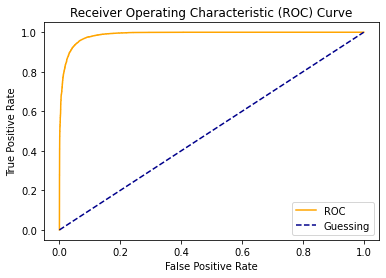

0.987770554329934

In [54]:
y_probs = RS_randomforest.predict_proba(X_test)

y_probs[:10]
y_probs_positive = y_probs[:, 1]
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)
roc_auc_score(y_test, y_probs_positive)

Feature ranking:
1. feature 10 (0.485264)
2. feature 19 (0.268894)
3. feature 17 (0.103533)
4. feature 7 (0.082037)
5. feature 16 (0.028299)
6. feature 5 (0.010326)
7. feature 18 (0.008914)
8. feature 8 (0.004100)
9. feature 12 (0.003863)
10. feature 3 (0.003405)
11. feature 11 (0.000908)
12. feature 15 (0.000212)
13. feature 14 (0.000154)
14. feature 0 (0.000092)
15. feature 6 (0.000000)
16. feature 4 (0.000000)
17. feature 13 (0.000000)
18. feature 2 (0.000000)
19. feature 1 (0.000000)
20. feature 9 (0.000000)


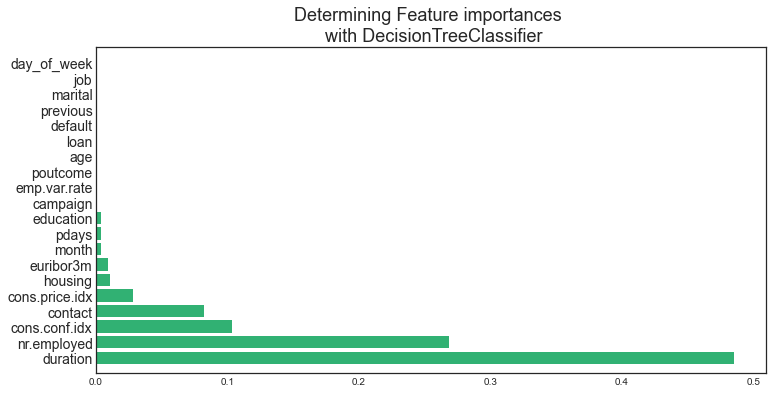

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn-white')

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)



tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = df.drop('y', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
#     plt.axhline(y=1.85, xmin=0.51, xmax=0.952, color='k', linewidth=3, linestyle='--')
    #plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()